<a href="https://colab.research.google.com/github/mafj0362/IT--Sec-1.2/blob/main/Kopia_av_inl%C3%A4mning_1__del_2mf20230902kl14%3A27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 2 - inlämning del 2 Analys av tweets från bokmässan

## Attribution David Johnsson, Uppsala University

Starta med att ladda in följande moduler och sätt upp visualiseringsmiljön för matplotlib

1. `pandas` Ett bibliotek för att hantera data i tabellform, ett av de absolut vanligaste biblioteken för data analytics.Vi kommer gå igenom pandas mer senare i kursen.
2. `textmining`
Funktioner för statistisk textmining, fokuserad på bag-of-words model (som ni inte behöver sätta er in för denna kurs.f För den nyfikne eller vetgirige finns enkla förklaringar exempelvis [här](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/) eller [här](https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/), en enkel tutorial finns också [här](https://machinelearningmastery.com/gentle-introduction-bag-words-model/))
3. `wordcloud` - En visualiseringsmodul för att skapa ordmoln, vilket vi gör i denna laboration.
4. `matplotlib` - Ett bibliotek för att skapa visualiseringar av tabelldata.
5. `sklearn` -  Scikit-learn,ett pythonbibliotek för maskininlärningsalgoritmer, den kommer vi använda mycket i både laboration 3 och 4.

In [6]:
pip install nltk

In [7]:
# Kör denna cell för att ladda in biblioteken och sätta upp vår miljö
import pandas as pd #handle data
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
tm.download('stopwords')
stopWords = tm.corpus.stopwords.words('swedish')
stopWords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['och',
 'det',
 'att',
 'i',
 'en',
 'jag',
 'hon',
 'som',
 'han',
 'på',
 'den',
 'med',
 'var',
 'sig',
 'för',
 'så',
 'till',
 'är',
 'men',
 'ett',
 'om',
 'hade',
 'de',
 'av',
 'icke',
 'mig',
 'du',
 'henne',
 'då',
 'sin',
 'nu',
 'har',
 'inte',
 'hans',
 'honom',
 'skulle',
 'hennes',
 'där',
 'min',
 'man',
 'ej',
 'vid',
 'kunde',
 'något',
 'från',
 'ut',
 'när',
 'efter',
 'upp',
 'vi',
 'dem',
 'vara',
 'vad',
 'över',
 'än',
 'dig',
 'kan',
 'sina',
 'här',
 'ha',
 'mot',
 'alla',
 'under',
 'någon',
 'eller',
 'allt',
 'mycket',
 'sedan',
 'ju',
 'denna',
 'själv',
 'detta',
 'åt',
 'utan',
 'varit',
 'hur',
 'ingen',
 'mitt',
 'ni',
 'bli',
 'blev',
 'oss',
 'din',
 'dessa',
 'några',
 'deras',
 'blir',
 'mina',
 'samma',
 'vilken',
 'er',
 'sådan',
 'vår',
 'blivit',
 'dess',
 'inom',
 'mellan',
 'sådant',
 'varför',
 'varje',
 'vilka',
 'ditt',
 'vem',
 'vilket',
 'sitta',
 'sådana',
 'vart',
 'dina',
 'vars',
 'vårt',
 'våra',
 'ert',
 'era',
 'vilkas']

## Analys av Twitterdata från bokmässan

Ni har blivit inhyrda som konsulter för en bokpublicist som vill att du ska ta reda på vilka teman och böcker som har fått mest uppmärksamhet på bokmässan i Göteborg 2016.

Er uppgift är att via Twitterdata undersöka vilka ämnen som fått speciellt mycket uppmärksamhet för och under bokmässan och presentera ett förslag till företaget du arbetar med vad som är lämpliga debattämnen.

Fokus här är alltså på att förstå data, vilket är en viktigt del av pre-processering inför mer avacerad dataanalys.

**F1.** Vad för data är distinkt för twitter och vilken typ av pre-processing tror ni kommer behövas på den typen av data?

## Data processing

Som alltid behöver vårt data städas, i detta fall är fokus att sortera bort data som antingen inte går att analysera eller inte är intressant från den råtextdata vi fått från Twitter. Den data som givits samlades in från Twitter från maj till september 2016.

Er datafil finns i mappen data i laborationsrepositoriet och heter `twitter_book_fair_data.tsv`.

### Ladda data

En `.tsv` fil betyder att det är en tab-separerad fil med tabelldata (jämfört med ; separerad som vi använt tidigare)

**F2** Starta arbetet med att läsa in filen med read_csv() med följande parametrar:  encoding="utf-8", sep="\t" och spara i en dataframe

In [8]:
file_path='twitter_book_fair_data.tsv';
encoding='utf-8';
separator='\t'

twitter_data = pd.read_csv(file_path,encoding=encoding, sep=separator);
twitter_data




,text,to_user_id,from_user,id,from_user_id,iso_language_code,source,profile_image_url,geo_type,geo_coordinates_0,geo_coordinates_1,created_at,time
0,rt @amiethekid: kvaellens avsnitt av raseriet ...,NaN,ornellanizii,780663045701955584,701149297,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:59:08 +0000 2016,1.474960e+09
1,maranatafoersamlingens monter paa bokmaessan v...,NaN,strrawbuz,780658066073198592,163765933,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:39:21 +0000 2016,1.474958e+09
2,idrotten blev en trygg zon under en jobbig ton...,NaN,birgittajekblom,780655458407383040,72873310,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,tue sep 27 06:28:59 +0000 2016,1.474958e+09
3,tillbakablick paa #bokmaessan #goeteborg del 1...,NaN,kimmkimselius,780654308002062336,65428329,sv,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_background_images...,NaN,0.0,0.0,tue sep 27 06:24:25 +0000 2016,1.474957e+09
4,"rt @flamman_: aha, vilken tid aer demon? hm, d...",NaN,annaherdy,780654122076962816,111971247,sv,"<a href=""https://about.twitter.com/products/tw...",http://abs.twimg.com/images/themes/theme17/bg.gif,NaN,0.0,0.0,tue sep 27 06:23:41 +0000 2016,1.474957e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,zwepol,766966928837664768,2994150045,sv,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:40 +0000 2016,1.471694e+09
9996,rt @viskot: apropaa #bokmaessan och det haer m...,NaN,hannabergmans,766966926463668224,873555458,sv,"<a href=""http://twitter.com/download/iphone"" r...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:39 +0000 2016,1.471694e+09
9997,rt @charlieafnord: hej @bokmassangbg. kommer n...,NaN,gnellriksson,766966850693566464,2233508656,sv,"<a href=""http://twitter.com/download/android"" ...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:55:21 +0000 2016,1.471694e+09
9998,rt @mxcartoons: nya tider kommenterar bokmaess...,NaN,hedvigkrook,766966686113071104,3065329706,sv,"<a href=""http://twitter.com"" rel=""nofollow"">tw...",http://abs.twimg.com/images/themes/theme1/bg.png,NaN,0.0,0.0,sat aug 20 11:54:42 +0000 2016,1.471694e+09


**F3** Inspektera den dataframe som skapats med lämpliga funktioner. Ta reda på följande:

Hur ser den ut?
Antal kolumner och rader?
Datatyper?

Glöm inte bort att när du utför operationer på en datafram så sparas ingenting om du inte skapar en variabel som du lagrar dina ändringar i! (alternativt skriver över den dataframe du har genom att sätta parametern inplace = True (default är False).

In [9]:
num_rows, num_columns = twitter_data.shape
data_types = twitter_data.dtypes
print("Antal rader: " , num_rows)
print("Antal kolumner: " , num_columns)
print("Data types: ", data_types)

Antal rader:  10000
Antal kolumner:  13
Data types:  text                  object
to_user_id            object
from_user             object
id                     int64
from_user_id           int64
iso_language_code     object
source                object
profile_image_url     object
geo_type              object
geo_coordinates_0    float64
geo_coordinates_1    float64
created_at            object
time                 float64
dtype: object


10 000 rader, 13 kolumner, flera olika datatyper object, int och floats


**F4** Finns det nullvärden i vårt dataset? Varför/varför inte?

In [10]:
null_check=twitter_data.isna()
print(null_check)

       text  to_user_id  from_user     id  from_user_id  iso_language_code  \
0     False        True      False  False         False              False   
1     False        True      False  False         False              False   
2     False        True      False  False         False              False   
3     False        True      False  False         False              False   
4     False        True      False  False         False              False   
...     ...         ...        ...    ...           ...                ...   
9995  False        True      False  False         False              False   
9996  False        True      False  False         False              False   
9997  False        True      False  False         False              False   
9998  False        True      False  False         False              False   
9999  False        True      False  False         False              False   

      source  profile_image_url  geo_type  geo_coordinates_0  \

Nulldata finns. Anledningarna till nulldatan beror på vilken kolumn som det berör, exempelvis profile_image_url kan nulldatan bero på avsaknad av profilbild. To_user_id är förmodligen ett svar till en annan användare, och om tweeten inte besvarar någon finns det inget värde för den.

**F5.** Hur många tweets i vårt dataset är nämnanden av andra användare (alltså när `@twittername` finns med i tweeten)

*Hint: Det kan vara till hjälp att använda funktionen `info()`*

In [11]:

twitter_data['mentions_count'] = twitter_data['text'].str.count('@');
mentions_sum=twitter_data['mentions_count'].sum()
print(mentions_sum)



10578


**F6.** En kolumn är speciellt intressant för vår **textanalys**, extrahera den från den dataframe vi lagrat all data i och skapa en variabel där du placerar denna data, döp variablen till `tweets_corpus`.

In [12]:
twitter_Data = pd.read_csv('/content/twitter_book_fair_data.tsv', encoding="utf-8", sep="\t")


tweets_corpus = twitter_Data['text']


print(tweets_corpus.head())

0    rt @amiethekid: kvaellens avsnitt av raseriet ...
1    maranatafoersamlingens monter paa bokmaessan v...
2    idrotten blev en trygg zon under en jobbig ton...
3    tillbakablick paa #bokmaessan #goeteborg del 1...
4    rt @flamman_: aha, vilken tid aer demon? hm, d...
Name: text, dtype: object


### Emojis

På Twitter är det väldigt vanligt med emojis 👍 ✨ 🐫 🎉 🚀 🤘.

Dessa kan innehålla mycket information som kan vara relevant för vår analys. Dock är det ofta svårt att analysera emojis med hjälp av vanliga verktug för NLP(Natural Language Processig).

Vi behöver därför ta bort dessa ur vårt utvalda dataset som skapades i uppgiften ovan.

Följande kod utför detta, ni behöver inte bry er om lambda just nu, men vi kommer gå igenom det lite senare i kursen.

In [13]:
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3       tillbakablick paa #bokmaessan #goeteborg del 1...
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F7.** Hur påverkas kvaliteten på vår analys potentiellt av att ta bort alla emojis? Förklara svaret.

Tar man bort emojis kan det försvinna viktig information från tweeten. Emojis kan förmedla känslor, eller ändra innebörd på en tweeet, exempelvis genom att visa sarkasm. Dock kan det vara svårt att tolka, då det finns flera innebörder och anvädningsområden och försvårar dataanalysen.

### Ta bort URLs
Det är också vanligt att man på Twitter länkar till olika webbplatser med hjälp av URL:er, när man gör textanalys på twitterdata är det vanligt att delar av dessa URL:er dyker upp som "mest frekventa ord" vilket påverkar vår analys negativs. Dessa behöver därför också tas bort.

In [14]:
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

<ipython-input-14-a9f2baf5a764>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_tweets = clean_tweets.str.replace(r'http\S+', '')


0       rt @amiethekid: kvaellens avsnitt av raseriet ...
1       maranatafoersamlingens monter paa bokmaessan v...
2       idrotten blev en trygg zon under en jobbig ton...
3        tillbakablick paa #bokmaessan #goeteborg del 1  
4       rt @flamman_: aha, vilken tid aer demon? hm, d...
                              ...                        
9995    rt @mxcartoons: nya tider kommenterar bokmaess...
9996    rt @viskot: apropaa #bokmaessan och det haer m...
9997    rt @charlieafnord: hej @bokmassangbg. kommer n...
9998    rt @mxcartoons: nya tider kommenterar bokmaess...
9999    rt @dolf371: tystnad aer yttrandefrihet  #bokm...
Name: text, Length: 10000, dtype: object

**F8.** Hur kan borttagandet av URL:er pvåerkar analysen och dess kvalitet, förklara svaret.

Borttagandet av URL:er kan negativt påverka analysen och kvaliteten på datan då ett URL kan exempelvis användas för att referera till en bok, istället för vid namn etc. Däremot behåller man URL:er påverkar det också datan negativt då många av orden som används späder ut datamängden och ordens position bland de mest frekvent använda, utan att egentligen tillföra mening.

### Funktion för att hitta mest frekventa ord

Ett sätt att förstå hur olika metoder för pre-processing påverkar ett dataset kan man räkna de mest förekommande orden efter varje operation som utförs. Eftersom vi kommer vilja utföra denna räkning många gånger under arbetet är de lämpligt att skapa en funktion för det som vi kan anropa flera gånger.

#### Vad är en Term Document Matrix (TDM)?

En TDM är en tabell där antalet unika ord räknas för varje dokument. För att göra detta på vårt Twitterdata är det lämpligt att skapa en TDM där varje tweet är en egen vektor där varje element består av de ord som finns i den tweeten. En tweet med tre unika ord blir alltså en vektor med tre element.

Nedanstående kod skapar denna TDM i form av en funktion med namn `create_term_document_matrix()`:

**F9** Koden nedan är inte kommenterad, lägg in kommentarer som förklarar vad som sker i koden. (No hittar dokumentationen för CountVectorizer() [här](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) och en kort beskrivning med exempel [här](https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/)

In [15]:
def create_term_document_matrix(corpus, min_df=1): #definierar en funktion som tar in en corpus och en parameter (min_df) som bestämmer lägsta frekvens av ett ord för att tas med i matrixen.
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords) #skapar ett objekt av en countvector, med min_df parametern, och stopwords listan från tidigare kod
    tfmatrix = cvec.fit_transform(corpus) #konverterar textdatan från corpus till en tdm
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names_out()) #returnerar tdm:en där varje kolumn är ett ord och varje rad ett dokument

**F10** Testa vår nya funktion genom att skapa en TDM endast för de tre första raderna i `clean_tweets` som kan sorteras ut med `.head(3)` funktionen.

In [16]:
#kod här..
threerow_clean_tweets= clean_tweets.head(3)

def create_term_document_matrix(corpus, min_df=1) :
 cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
 tfmatrix = cvec.fit_transform(corpus)
 return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names_out())

create_term_document_matrix(threerow_clean_tweets)




,amiethekid,avsnitt,bok,bokmaessan,carolina,daer,dagensnyheter,gaest,haer,hittar,...,monter,paa,poddar,raseriet,rt,tonaarstid,trygg,vandaliserad,vanligtvis,zon
0,1,1,0,1,0,1,0,0,1,1,...,0,1,1,1,1,0,0,0,1,0
1,0,0,0,2,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0,0,1,1,1,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1


**F11.** Hur många kolumner skapades i TDM:n med bara 3 av raderna i vårt corpus?

28


För att hitta de mest frekvent förekommander orden i vår TDM behöver vi räkna ord. Det är också lämpligt med en visualisering över dessa vanligast förekommande ord. Även detta kommer vi behöva göra flera gånger och därför är det återigen lämpligt att definiera en funktion `plot_top_words()` som både räknar och plottar orden i ett stapeldiagram.

**F12** I nedanstående cell är funktionen definierad, men koden är återigen inte kommenterad, skapa kommentarer (eller skriv i en markdowncell) som förklarar vad funktionen gör.


In [17]:
def plot_top_words(tweets, num_word_instances, top_words): #definerar funktionen plot top words med 3 argument
    tdm_df = create_term_document_matrix(tweets, min_df=2) # skapar en tdm med med tweetsen skickad till funktionen, samt df=2 betyder att orden ska finnas i minst 2 av dokumenten för att användas
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum() # Ta ut orden, dvs kolumnerna ur matrixen, ifall längden är större än 1, summera dom, och spara i variabeln.
    sorted_words = word_frequencies.sort_values(ascending=False) #sortera orden från störst till minst förekommande och spara i ny variabel
    top_sorted_words = sorted_words[:num_word_instances] #skapar en ny variabel utifrån de sorterade orden i descending order, och tar med num_word_instances antal ord.
    top_sorted_words[:top_words].plot.bar() #skapar en bar plot (chart) utifrån de utvalda orden
    return top_sorted_words #returnerar den

Nu kan vi använda `plot_top_words()` funktionen för att räkna ut de mest förekommande orden i hela vårt corpus, viktigt att ha tålamod dock för det kan ta ett tag. Nedanstående kod utför beräkningen.

bokmaessan         9858
paa                5256
rt                 4805
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
kl                  648
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           375
tider               374
vaar                366
aar                 306
bok                 284
30                  278
vill                278
just                270
plats               265
se                  260
kommer              259
in                  254
itorget             247
20                  235
boecker             233
10                  233
daer                231
finns               227
pratar              226
varfoer         

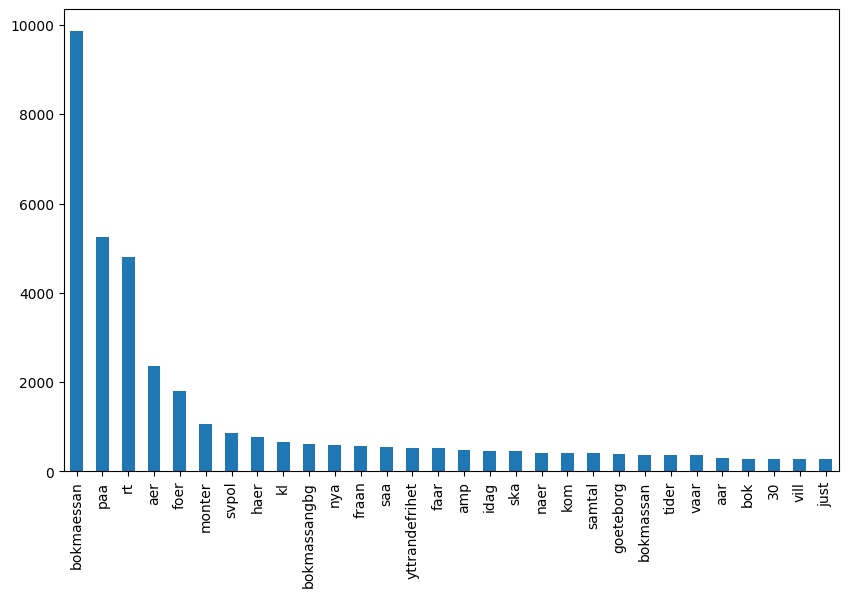

In [18]:
top_words = plot_top_words(clean_tweets, 50, 30)
top_words

**F13** Hur många gånger måste ett ord finnas i corpuset för att finnas med i resultatet `top_words` så som koden är skriven ovan?

183


**F14.** Hur många ord plottas i stapeldiagrammet?

30

### Små bokstäver

Nästa steg i pre-processingen av vårt dataset (vårt corpus) är att göra om alla bokstäver till små.

**F15**

a.Utför ändringen att alla stora bokstäver blir små bokstäver i `clean_tweets` och spara i en ny variabel kallad `tweets_lowered`

b.Varför vill man göra det för vår analys?


In [20]:
# tweets_lowered = clean_tweets.str.lower()
tweets_lowered = [tweet.lower() for tweet in clean_tweets]
print(tweets_lowered)


['rt @amiethekid: kvaellens avsnitt av raseriet hittar du haer:  eller daer du vanligtvis lyssnar paa poddar &lt;3 #bokmaessan', 'maranatafoersamlingens monter paa bokmaessan vandaliserad   #maranata  #bokmaessan', 'idrotten blev en trygg zon under en jobbig tonaarstid: carolina klft om sin bok. @dagensnyheter gaest paa #bokmaessan ', 'tillbakablick paa #bokmaessan #goeteborg del 1  ', 'rt @flamman_: aha, vilken tid aer demon? hm, den krockar med mina nyponarrangemang.  #bokmaessan #svpol', 'aha, vilken tid aer demon? hm, den krockar med mina nyponarrangemang.  #bokmaessan #svpol', 'rt @mariabennet2000: tack lisa bjurwald - rakryggat och otroligt viktigt!  #bokmaessan #bokmaessan2016 #lisabjurwald h', 'rt @mvasara: haer aer den gardell ni borde laesa #bokmaessan ', 'boksmaellan aer paataglig. men hellre boksmaella aen baksmaella, som de gamla grekerna sa. right? #bokmaessan', 'tack lisa bjurwald - rakryggat och otroligt viktigt!  #bokmaessan #bokmaessan2016 #lisabjurwald ', 'vad haende

Så samma ord som är skrivna olika, såsom "test" och "TEST" tas med i samma beräkning

**F16** Räkna ut en ny variabel med de mest förekommander (frekventa) orden, döp den till `top_words_lowered`

bokmaessan        9858
paa               5256
rt                4805
aer               2351
foer              1811
monter            1052
svpol              850
haer               761
kl                 648
bokmassangbg       604
nya                595
fraan              580
saa                550
yttrandefrihet     531
faar               521
amp                479
idag               456
ska                446
naer               413
kom                411
samtal             409
goeteborg          400
bokmassan          375
tider              374
vaar               366
aar                306
bok                284
30                 278
vill               278
just               270
dtype: int64


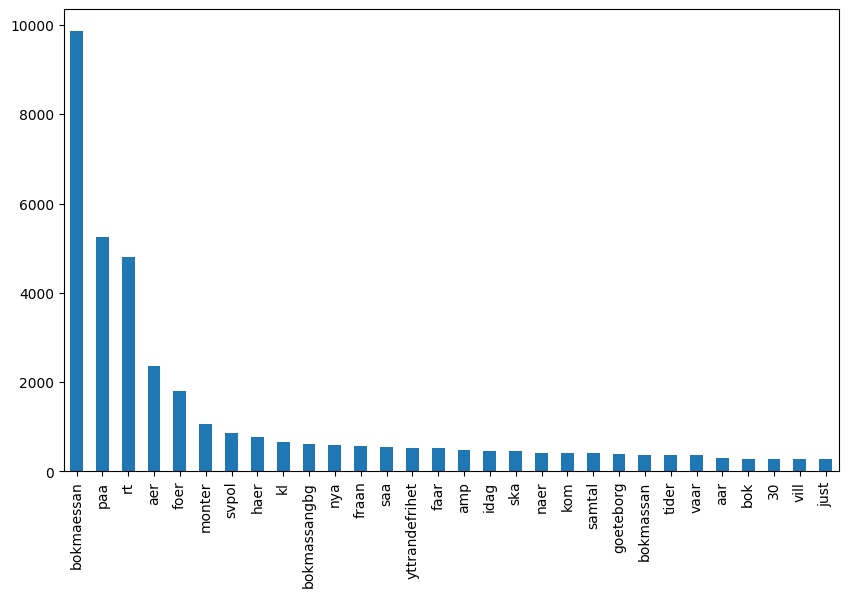

In [22]:
#Skriv klart denna kodcell för F1.16

top_words_lowered = plot_top_words(tweets_lowered, 30, 50)

print(top_words_lowered)


**F17.** Har något förändrats, vad? Förklara svaret.

Vi ser att vissa ord dyker upp i resultat 1, men inte i resultat 2 och vicce versa.
Detta borde bero på att vissa ord i större utströckning förekommer med både stor och liten bokstav i början. Detta skulle efter vår behandling öka förekomsten av ett sådant ord, men inte av andra.

För att underlätta att jämföra vad våra ansträngningar får för resultat kan det vara bra att enkelt kunna jämföra olika listor med top_words.

**F18 a** Skapa en ny dataframe som har två kolumner, en med de 20 mest frekventa orden från`top_words` och en med de 20 mest frekventa orden från `top_word_lowered`. Döp kolumnerna till `Top tweeted clean`och  `Top tweeted lowered`.

In [24]:
pd.DataFrame({
    'Top tweeted clean': top_words[0:30].index,
    'Top tweeted lowered': top_words_lowered[0:30].index
})

,Top tweeted clean,Top tweeted lowered
0,bokmaessan,bokmaessan
1,paa,paa
2,rt,rt
3,aer,aer
4,foer,foer
5,monter,monter
6,svpol,svpol
7,haer,haer
8,kl,kl
9,bokmassangbg,bokmassangbg


No charts were generated by quickchart


**F18 b** Ett annnat sätt att göra ungefär samma sak, fast lite mer automatiskt är nedanstående kod som också jämför de första 20 orden. Gör om den så att den istället för att jämföra de 20 mest frekventa orden, jämför de ord som är **minst** förekommande i de två listorna `top_words`och `top_words_lowered`.

**F19** Vad returnerar nedanstående kodrad om de två listor som jämförs är identiska? Vad returneras om de inte är identiska?

Vi ser att Not A Number dyker upp just för att listorna inte är identiska.
hade listorna varit identiska så hade frekvensen varit exakt samma.

In [28]:
import pandas as pd

least_frequent_clean = top_words[-20:]
least_frequent_lowered = top_words_lowered[-20:]

df2 = pd.DataFrame({'Least frequent top words': least_frequent_clean, 'Least frequent top words lowered': least_frequent_lowered})

print(df2)


                 Least frequent top words  Least frequent top words lowered
10                                  233.0                               NaN
15                                  206.0                               NaN
20                                  235.0                               NaN
30                                    NaN                             278.0
aar                                   NaN                             306.0
amp                                   NaN                             479.0
bara                                183.0                               NaN
bibliotek                           198.0                               NaN
boecker                             233.0                               NaN
bok                                   NaN                             284.0
bokmassan                             NaN                             375.0
charlieafnord                       204.0                               NaN
daer        

In [27]:
set(top_words[0:20].index) - set(top_words_lowered[0:20].index)

set()

### Korta ord

Korta ord har ofta inte någon egentlig betydelse, alltså behöver vi inte dessa ord. Typiska sådana ord kan vara ja, jo eller nej. Vi bestämmer oss för att alla ord som är kortare än 3 bokstäver inte innehar någon betydelse i vår analys och tar därmed bort dem.

**F20** Ta bort alla ord med färre bokstäver än 3(HINT: [regular expressions](https://docs.python.org/3/howto/regex.html)), lägg den nya listan med ord (som inte innehåller ord med färre bokstäver än 3) i en variabel med namn `tweets_low_no_small`



bokmaessan         9858
https              7055
paa                5256
aer                2351
foer               1811
monter             1052
svpol               850
haer                761
bokmassangbg        604
nya                 595
fraan               580
saa                 550
yttrandefrihet      531
faar                521
amp                 479
idag                456
ska                 446
naer                413
kom                 411
samtal              409
goeteborg           400
bokmassan           376
tider               374
vaar                366
aar                 306
bok                 284
vill                278
just                270
plats               265
kommer              259
itorget             247
boecker             233
daer                231
finns               227
pratar              226
varfoer             216
tack                216
pedagogikscenen     210
charlieafnord       204
bibliotek           198
seminarium          191
saeger          

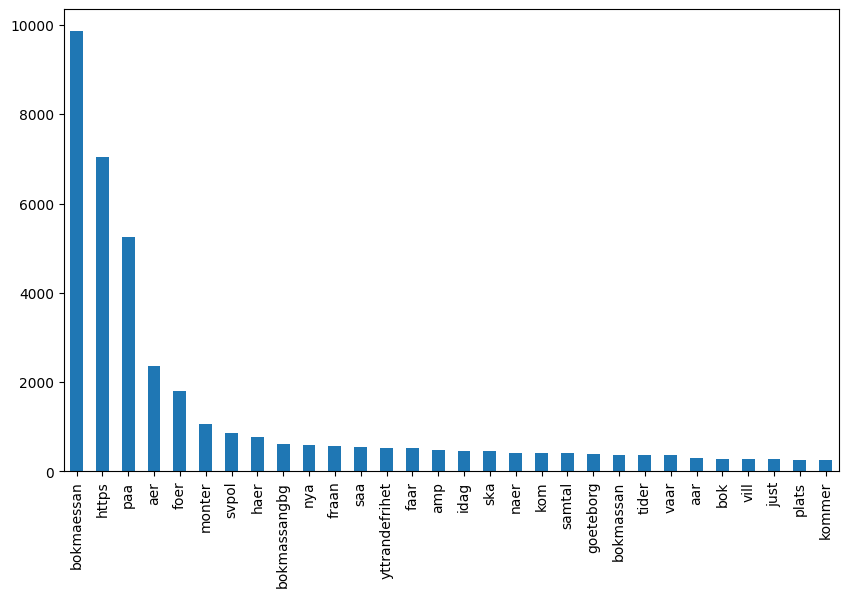

In [31]:

import pandas as pd
import re

data = pd.read_csv("twitter_book_fair_data.tsv", delimiter="\t")


tweets = data["text"]


pattern = r'\b\w{3,}\b'


tweets_low_no_small = [' '.join(re.findall(pattern, tweet)) for tweet in tweets]

# Skapa en ny topplista med de mest frekventa orden i tweets_low_no_small
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)

# Skriv ut de mest frekventa orden i den nya topplistan
print(top_words_low_no_small)



**F21.** Efter att korta ord tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan?

175


### Betydelselösa ord

Stop words är andra ord som inte är korta men som ändå inte har betydelse, dessa kan vara lite besvärligare att identifiera och ta bort. En möjlighet är att helt enkelt skapa en lista med sådana ord och sedan använda den listan för att filtrera ut orden ur ett corpus. Vi har ju redan tagit bort alla ord med färre bokstäver än 3, så sådana behöver vi inte lägga in i listan.

Nedan är ett exempel på en lista med stoppord som är betydelselösa.


In [ ]:
my_stop_words = ["och", "det", "att", "i", "en", "jag", "hon",
                "som", "han", "paa", "den", "med", "var", "sig",
                "foer", "saa", "till", "aer", "men", "ett",
                "om", "hade", "de", "av", "icke", "mig", "du",
                "henne", "daa", "sin", "nu", "har", "inte",
                "hans", "honom", "skulle", "hennes", "daer",
                "min", "man", "ej", "vid", "kunde", "naagot",
                "fraan", "ut", "naer", "efter", "upp", "vi",
                "dem", "vara", "vad", "oever", "aen", "dig",
                "kan", "sina", "haer", "ha", "mot", "alla",
                "under", "naagon", "eller", "allt", "mycket",
                "sedan", "ju", "denna", "sjaelv", "detta",
                "aat", "utan", "varit", "hur", "ingen", "mitt",
                "ni", "bli", "blev", "oss", "din", "dessa",
                "naagra", "deras", "blir", "mina", "samma",
                "vilken", "er", "saadan", "vaar", "blivit",
                "dess", "inom", "mellan", "saadant", "varfoer",
                "varje", "vilka", "ditt", "vem", "vilket",
                "sitta", "saadana", "vart", "dina", "vars",
                "vaart", "vaara", "ert", "era", "vilka"]

När vi skapat vår lista är det dags att skapa en funktion som tar bort dessa från ett dokument. Denna funktion är kodad i cellen nedan. (Igen strunta i lambda för tillfället.)

In [ ]:
remove_stopwords = lambda x: ' '.join(y for y in x.split() if y not in my_stop_words)

Funktionen ovan tar alltså bort stoppord från ett dokument (alltså en tweet), för att ta bort stoppord från hela vårt corpus kan funktionen `.apply()`användas.

**F22.** Skriv den kod som tar bort alla stoppord från `tweets_low_no_small` och skapar en ny variabel `tweets_low_no_small_stopwords` för corpuset utan stoppord.

In [ ]:
tweets_low_no_small_stopwords = ...#din kod här

In [ ]:
top_words_low_no_small_stopwords = plot_top_words(tweets_low_no_small_stopwords, 50, 30)
top_words_low_no_small_stopwords

**F23.** Efter att stopporden tagits bort, hur många gånger måste ett ord förekomma i vårt corpus för att hamna i den nya listan enligt ovan?

**F24.** Vad är skillnaderna mellan de frekvent förekommande orden i jämförelse med våra tidigare listor? Skriv den kod som jämför dessa tre listor `top_words_lowered`, `top_words_low_no_small` and `top_words_low_no_small_stopwords`, titta på de första 20 orden i listorna.


### Visualisering och rekommendation

Dags att visualisera vårt resultat och övertyga vår klient om att vi hittat de bästa debattämnena för dem! Här gör vi det genom att skapa ett word cloud där de mest frekventa orden syns bäst.

Nedanstående kod skapar ett ordmoln för `top_words_low_no_small_stopwords`

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=40)
wordcloud.fit_words(top_words_no_small_stopwords.to_dict())
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**F25** Ändra i tidigare kod hur många gånger ett ord minst måste finnas för att det ska inkluderas i ordmolnet. Vad förändras?

**F26** När du tittar på ordmolnet, är det fler ord som borde vara stoppord? Ange några stycken och förklara varför de bör tas bort.

**F27.** Vilket tema rekommenderar ni att publicisten ska ha som debattämne? Förklara svaret.

**F28.** Ni har nu arbetat med textdata, hur är det annorlunda när det gäller pre-processing jämfört med annan typ av data som är av mer numerisk eller kategorisk karaktär?

---
*När ni besvarat samtliga frågor och all er kod fungerar i enlighet med instruktioner, glöm då inte att lämna in en länk till ert repositorie med den färdiga lösningen körd i era notebooks, senast det datum som är angivet. Infoga också en knapp till Colaboratory om ni använt er av denna miljö*.

**Glöm inte heller att versionshantera i GitHub så att jag kan följa ert arbete!**

Lycka till!